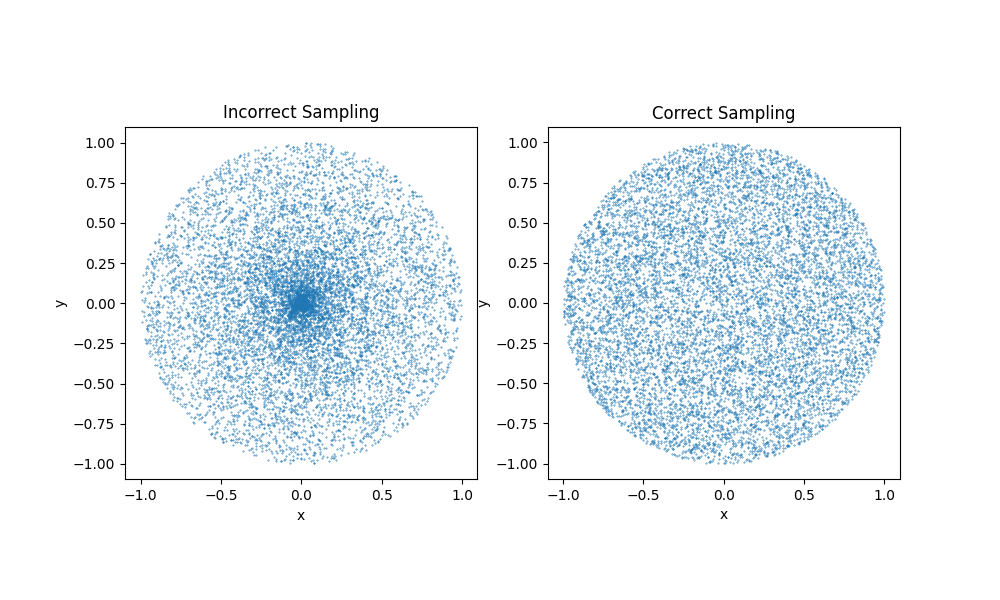

In [1]:
"""surface_sampling_circle.ipynb"""
# Cell 1:  Demonstrate incorrect and correct methods for uniformly generating random points inside a circle. 

# Modified original code written by @dbiersach:
# https://github.com/dbiersach/qis101/blob/0aa4537a02ac7f71d62ce6bbaf54e1e3175a5d51/labs/Session%2020%20-%20Monte%20Carlo%20Methods/surface_sampling_circle.ipynb

# Used this video to generate corrected sampling: https://www.youtube.com/watch?v=Ooo30_5GJFA

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    """Plots biased random sampling for points inside a circle"""
    num_samples = 10000 # Plot 10_000 dots

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r: NDArray[np.float_] = random.rand(num_samples) # Radius of each point

    # Generate (x, y) coords from polar coordinates
    x: NDArray[np.float_] = r * np.cos(v)
    y: NDArray[np.float_] = r * np.sin(v)

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    # Plot the incorrect sampling
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def plot_correct(ax: Axes) -> None:
    """Plot uniform random sampling for points inside a circle"""
    num_samples = 10000 # Generate 10_000 random points

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    # Create array of random samples from [0, 1) chosen from a uniform distribution
    r: NDArray[np.float_] = random.rand(num_samples)

    # Generate x and y coordinates from polar coordinates
    """
    Use the square root of radius values to account for the fact that r was generated
    from a uniform distribution, but the area of concentric rings from the inside 
    to the outside of the circle does not follow a normal distribution. More points
    are needed toward the edges of the circle to create a truly uniform sampling.
    """
    x: NDArray[np.float_] = np.sqrt(r) * np.cos(v)
    y: NDArray[np.float_] = np.sqrt(r) * np.sin(v)

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    # Plot the corrected sampling
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def main() -> None:
    plt.figure(" ", figsize=(10, 6))
    plot_incorrect(plt.subplot(121))
    plot_correct(plt.subplot(122))
    plt.show()


main()